In [132]:
# Installed important Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
import io
%cd '/Users/junaidsheikh/Desktop/Python/Black Friday Sales'

/Users/junaidsheikh/Desktop/Python/Black Friday Sales


In [134]:
traindf=pd.read_csv('train.csv')

In [135]:
testdf=pd.read_csv('test.csv')

In [136]:
# Understanding the number of observation and data type prensent in the Dataframe
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [137]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [138]:
# top 5 observations 
traindf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [139]:
# Extracting numeric and object column

objectcols=traindf.select_dtypes(include='object')
numericcols=traindf.select_dtypes(include=np.number)

In [140]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
dtypes: object(5)
memory usage: 21.0+ MB


In [141]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Occupation          550068 non-null  int64  
 2   Marital_Status      550068 non-null  int64  
 3   Product_Category_1  550068 non-null  int64  
 4   Product_Category_2  376430 non-null  float64
 5   Product_Category_3  166821 non-null  float64
 6   Purchase            550068 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 29.4 MB


In [142]:
#droping User_ID as it not required for exploratory data analysis
numericcols=numericcols.drop('User_ID',axis=1)

In [143]:
#describe helps to understand if there is any deviation between mean and median
numericcols.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [144]:
print('skew: ',numericcols.skew())

skew:  Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64


(array([ 36844.,  57919., 132275., 104918.,  76784.,  30178.,  64558.,
         12695.,  31539.,   2358.]),
 array([1.20000e+01, 2.40690e+03, 4.80180e+03, 7.19670e+03, 9.59160e+03,
        1.19865e+04, 1.43814e+04, 1.67763e+04, 1.91712e+04, 2.15661e+04,
        2.39610e+04]),
 <BarContainer object of 10 artists>)

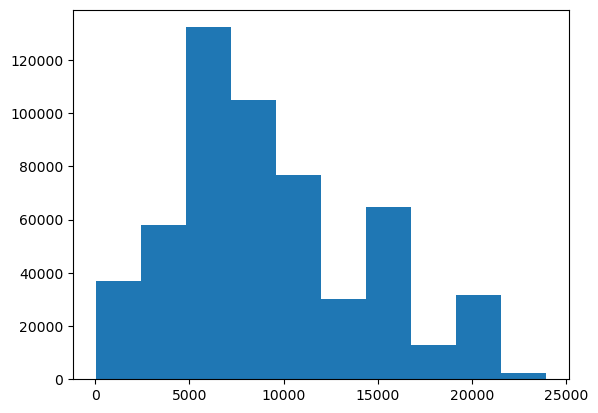

In [145]:
#Peak of the graph is on the left as its positivelily skewed
plt.hist(numericcols.Purchase)

<Figure size 700x700 with 0 Axes>

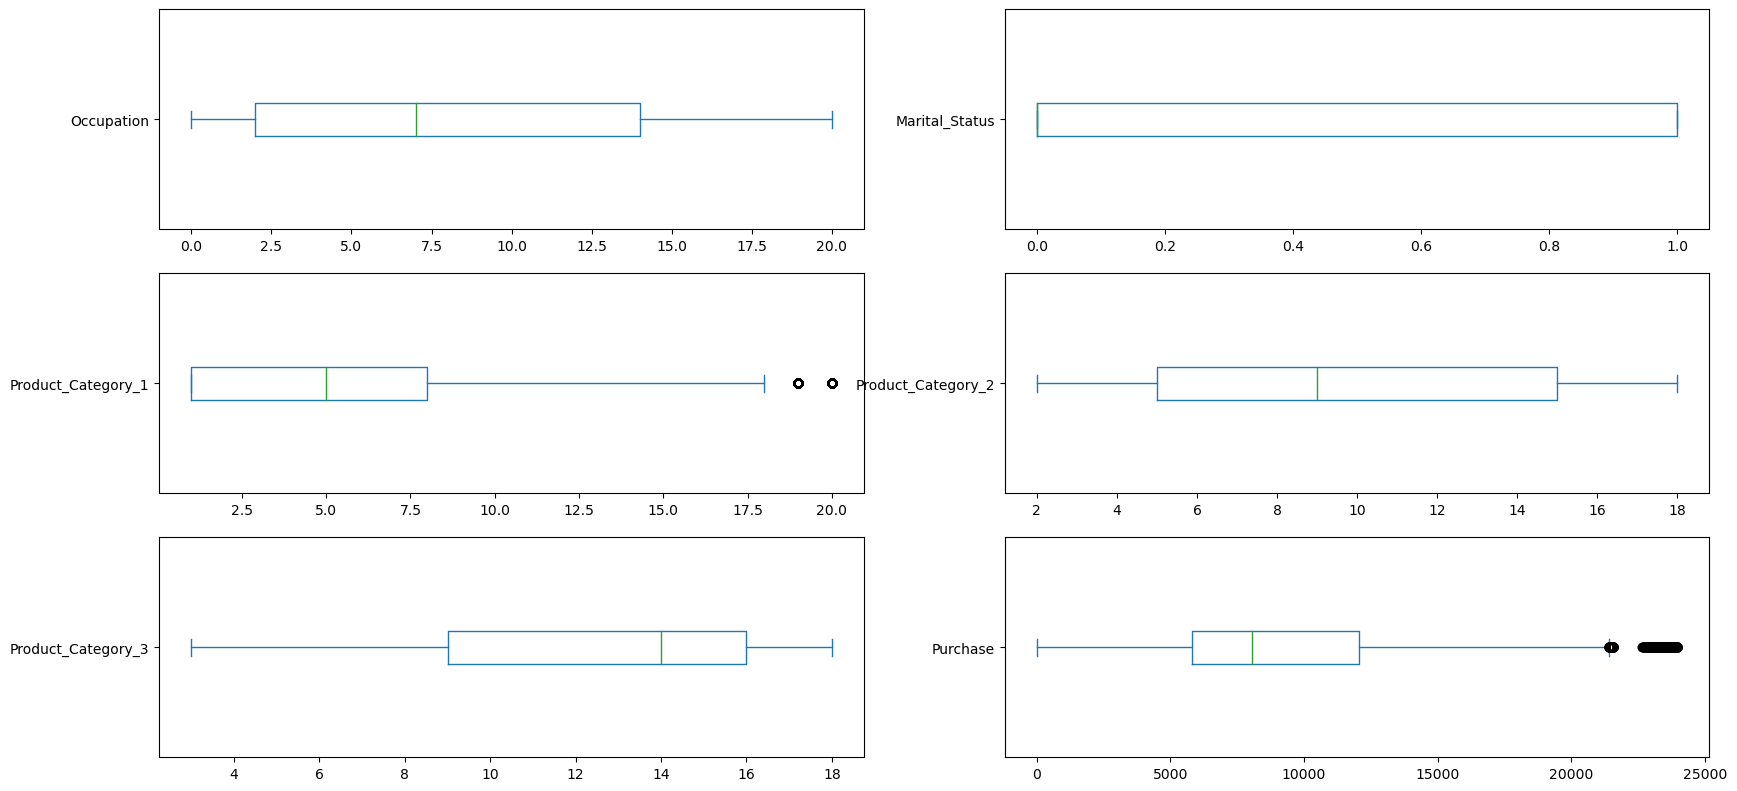

In [146]:
plt.figure(figsize=(7,7))
numericcols.plot(kind='box', subplots=True, layout=(6,2),sharey=False, 
          sharex=False, figsize=(20, 20),vert=False);

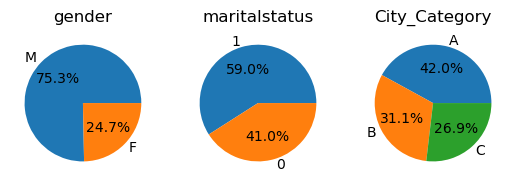

In [147]:
#percentge of demographics involved in shopping 
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
ax1.pie(objectcols.Gender.value_counts(),autopct="%.1f%%",
        labels=['M','F'])
ax1.set_title("gender")
ax2.pie(numericcols.Marital_Status.value_counts(),autopct="%.1f%%",
       labels=["1","0"])
ax2.set_title("maritalstatus")
ax3.pie(objectcols.City_Category.value_counts(),autopct="%.1f%%",
       labels=["A","B","C"])
ax3.set_title("City_Category")
plt.show()

In [148]:
# Data Aggregations
traindf.Purchase.groupby(traindf.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [149]:
traindf.Purchase.groupby(traindf.Marital_Status).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [150]:
traindf.Purchase.groupby(traindf.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [151]:
traindf.Purchase.groupby(traindf.City_Category).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [152]:
# adding an addition variable to combine test and train data frame
testdf['Purchase']='test'

In [153]:
combinedf=pd.concat([traindf,testdf],axis=0)

In [154]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    783667 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 77.7+ MB


In [155]:
combinedf.isnull().sum().sort_values(ascending=False)

Product_Category_3            545809
Product_Category_2            245982
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [156]:
combinedf.isnull().sum().sort_values(ascending=False)/combinedf.shape[0]

Product_Category_3            0.696481
Product_Category_2            0.313886
User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Purchase                      0.000000
dtype: float64

In [157]:
# Missing value imputation
combinedf.Product_Category_2=combinedf.Product_Category_2.fillna(combinedf.Product_Category_2.median())

In [158]:
combinedf.Product_Category_3=combinedf.Product_Category_3.fillna(combinedf.Product_Category_3.median())

In [159]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 77.7+ MB


In [160]:
objectcols_df=combinedf.select_dtypes(include='object')
numericcols_df=combinedf.select_dtypes(include=np.number)

In [161]:
objectcols_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  783667 non-null  object
 1   Gender                      783667 non-null  object
 2   Age                         783667 non-null  object
 3   City_Category               783667 non-null  object
 4   Stay_In_Current_City_Years  783667 non-null  object
 5   Purchase                    783667 non-null  object
dtypes: object(6)
memory usage: 41.9+ MB


In [162]:
objectcols_df=objectcols_df.drop('Product_ID',axis=1)

In [163]:
numericcols_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             783667 non-null  int64  
 1   Occupation          783667 non-null  int64  
 2   Marital_Status      783667 non-null  int64  
 3   Product_Category_1  783667 non-null  int64  
 4   Product_Category_2  783667 non-null  float64
 5   Product_Category_3  783667 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 41.9 MB


In [164]:
numericcols_df=numericcols_df.drop('User_ID',axis=1)

In [165]:
objectcols_df['Marital_Status']=numericcols_df.Marital_Status

In [166]:
numericcols_df=numericcols_df.drop('Marital_Status',axis=1)

In [167]:
#Scaling the data to get similar units
from sklearn.preprocessing import StandardScaler

In [168]:
standard=StandardScaler()

In [169]:
numericcols_standard=standard.fit_transform(numericcols_df)

In [170]:
numericcols_standard=pd.DataFrame(numericcols_standard,columns=numericcols_df.columns)

In [171]:
numericcols_standard.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,0.294486,-0.610134,-0.136865,0.171679
1,0.294486,-1.125843,-0.845486,0.171679
2,0.294486,1.710556,-0.136865,0.171679
3,0.294486,1.710556,1.044171,0.171679
4,1.214421,0.679138,-0.136865,0.171679


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
objectcols_label=objectcols_df.drop('Purchase',axis=1).apply(le.fit_transform)

In [44]:
objectcols_label.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
0,0,0,0,2,0
1,0,0,0,2,0
2,0,0,0,2,0
3,0,0,0,2,0
4,1,6,2,4,0


In [45]:
objectcols_clean=objectcols_label.reset_index()

In [46]:
numericcols_clean=numericcols_standard.reset_index()

In [47]:
combine_clean=pd.concat([numericcols_clean,objectcols_clean],axis=1)

In [48]:
objectcols_clean=objectcols_df.reset_index()

In [49]:
combine_clean['Purchase']=objectcols_clean.Purchase

In [50]:
#Extracting train and test dataset
train_clean=combine_clean[combine_clean.Purchase!='test']
test_clean=combine_clean[combine_clean.Purchase=='test']

In [51]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 550068 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       233599 non-null  int64  
 1   Occupation                  233599 non-null  float64
 2   Product_Category_1          233599 non-null  float64
 3   Product_Category_2          233599 non-null  float64
 4   Product_Category_3          233599 non-null  float64
 5   index                       233599 non-null  int64  
 6   Gender                      233599 non-null  int64  
 7   Age                         233599 non-null  int64  
 8   City_Category               233599 non-null  int64  
 9   Stay_In_Current_City_Years  233599 non-null  int64  
 10  Marital_Status              233599 non-null  int64  
 11  Purchase                    233599 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 23.2+ MB


In [52]:
test_clean=test_clean.drop(['Purchase','index'],axis=1)

In [53]:
train_clean=train_clean.drop('index',axis=1)

In [54]:
train_clean.Purchase=train_clean.Purchase.astype('int64')

In [55]:
X=train_clean.drop('Purchase',axis=1)
y=train_clean.Purchase

<AxesSubplot: >

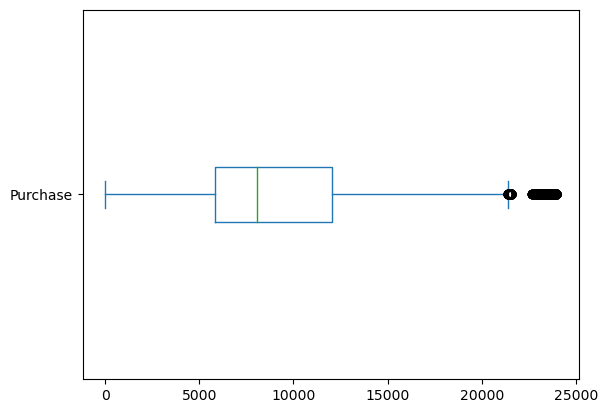

In [56]:
y.plot(kind='box',vert=False)

<AxesSubplot: >

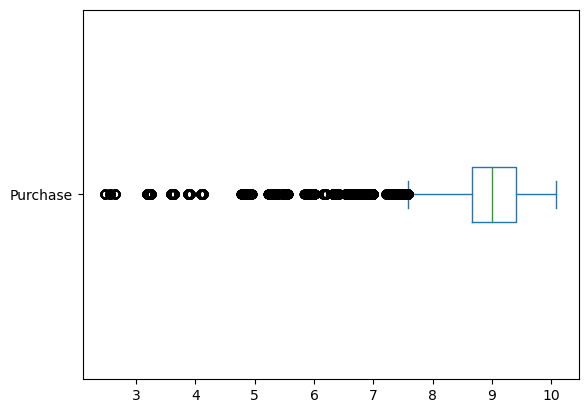

In [57]:
np.log(y).plot(kind='box',vert=False)

<AxesSubplot: >

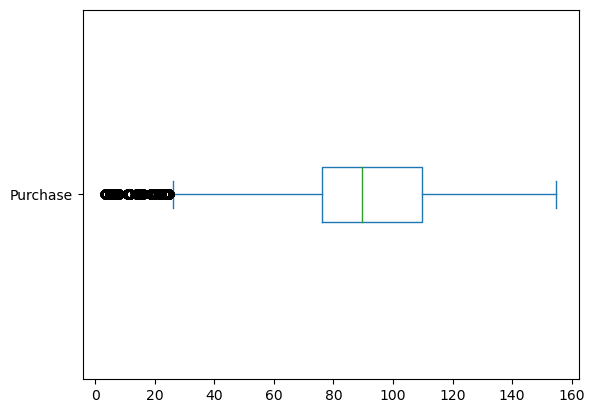

In [58]:
np.sqrt(y).plot(kind='box',vert=False)

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
reg=LinearRegression()

In [84]:
regmodel=reg.fit(X,np.log(y))

In [87]:
regmodel.score(X,np.log(y))

0.19224450943633498

# Decision tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
tree=DecisionTreeRegressor(max_depth=8)

In [106]:
treemodel=tree.fit(X,y)

In [107]:
treemodel.score(X,y)

0.6523861502976589

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
cross_val_score(tree,X,y)

array([0.64120943, 0.64259314, 0.64299043, 0.64407002, 0.66913017])

In [110]:
np.mean([0.64120943, 0.64259314, 0.64299043, 0.64407002, 0.66913017])

0.647998638

# Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rb=RandomForestRegressor(n_estimators=60,max_depth=8)

In [125]:
rbmodel=rb.fit(X,y)

In [126]:
rbmodel.score(X,y)

0.6538978486328665

In [127]:
cross_val_score(rb,X,y)

array([0.64282081, 0.64431673, 0.64516243, 0.64560354, 0.67058155])

In [128]:
np.mean([0.64282081, 0.64431673, 0.64516243, 0.64560354, 0.67058155])

0.649697012

# Gradient Boosting Regressor

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

In [130]:
gb=GradientBoostingRegressor(n_estimators=60,max_depth=8)

In [78]:
gbmodel=gb.fit(X,y)

In [79]:
gbmodel.score(X,y)

0.6737549498866411

In [80]:
cross_val_score(gb,X,y)

array([0.65846916, 0.66094684, 0.66115437, 0.65953171, 0.68421983])

In [131]:
np.mean([0.65846916, 0.66094684, 0.66115437, 0.65953171, 0.68421983])

0.664864382

In [82]:
gbpredict=gbmodel.predict(test_clean)

In [83]:
pd.DataFrame(gbpredict).to_csv('gb.csv')